In [1]:
import sys
import numpy as np
from core import stagger_FD_coeff as sfci
from core.utils import Logger
from neal import SimulatedAnnealingSampler
import time
from core.QUBO_solvers import IterSampleSolver
import matplotlib.pyplot as plt
from contextlib import redirect_stdout
from tqdm import tqdm

pi = np.pi

In [2]:
v = 4500
h = 10
tao = 0.001
freq_max_set = [174]
M_set = [8]
sample_num = 100 # 100
max_iter_num = 20
max_iter4_solver = 5
epsilon4linsys = 1e-20
sampler = SimulatedAnnealingSampler()


# Influence of Regularization

In [3]:
# this program will take a long time !!!
log_filename = f"Inf_reg_{time.strftime('%Y%m%d%H%M', time.localtime())}.txt"
with open(log_filename, "w") as log_file, redirect_stdout(
    Logger(log_filename, sys.stdout)
):

    print(f"v={v}")
    print(f"freq={174}")
    print(f"M={8}")
    print(f"sample time = {sample_num}")
    print(f"max_iter_num = {max_iter_num}")
    print(f"max_iter_num_in_iterative_solver = {max_iter4_solver}")
    print("b_alpha = 1*0.1*it change in big loop")  # alpha = 1 * 0.8 ** it
    print("s_alpha = b_alpha change in small loop")

    for it_num in tqdm(range(20)):
        print(f" >>> Start the {it_num} experiment.")
        qa_a0_nonreg_dict = {}
        for M, freq_max in zip(M_set, freq_max_set):
            linear_sys = sfci.Stagger_FD_coeff_1D(v, h, tao, freq_max, L=20)
            sis = IterSampleSolver(
                sampler=sampler,
                x0=np.ones(M) / 100,  # initial vector of Delta a
                num_sample=sample_num,
                R=10,
                fixed_point=1,
                epsilon=1e-10,
                maxiter=max_iter4_solver,  # max iteration in small iteration
                resultMod="lowest_energy",
            )
            qa_a0 = linear_sys.solve(
                M=M,
                max_iter_num=max_iter_num,
                mode_of_construct="direct",
                solver=sis.solve,
                epsilon=epsilon4linsys,
                show_process=False,
            )
            qa_a0_nonreg_dict[f"Non_reg"] = qa_a0

        qa_a0_reg_dict = {}
        for M, freq_max in zip(M_set, freq_max_set):
            linear_sys = sfci.Stagger_FD_coeff_1D(v, h, tao, freq_max, L=20)
            sis = IterSampleSolver(
                sampler=sampler,
                x0=np.ones(M) / 100,  # initial vector of Delta a
                num_sample=sample_num,
                R=10,
                fixed_point=1,
                epsilon=1e-10,
                maxiter=max_iter4_solver,  # max iteration in small iteration
                resultMod="lowest_energy",
            )
            qa_a0 = linear_sys.solve(
                M=M,
                max_iter_num=max_iter_num,
                mode_of_construct="direct",
                epsilon=epsilon4linsys,
                solver=sis.solve,
                show_process=False,
                SampleSolver_param_dict={"alpha" : 1.0, "drate" : 0.1}
            )
            qa_a0_reg_dict[f"Reg"] = qa_a0

        print(f" <<< End the {it_num} experiment.")

v=4500
freq=174
M=8
sample time = 100
max_iter_num = 20
max_iter_num_in_iterative_solver = 5
b_alpha = 1*0.1*it change in big loop
s_alpha = b_alpha change in small loop


  0%|          | 0/20 [00:00<?, ?it/s]

 >>> Start the 0 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~



d:\OneDrive\OneDrive - mails.ucas.ac.cn\Research\2_Monthly_Report\2024博三下半学期\博士期间第一篇工作\code_for_the_paper\Solution_of_Forward_Operator\core\QUBO_solvers.py:194: UserWarning: 'postprocess' indicates whether to optimize the result after sampler finish its work. Default method is 'SteepestDescentSolver'.
  warnings.warn(
d:\OneDrive\OneDrive - mails.ucas.ac.cn\Research\2_Monthly_Report\2024博三下半学期\博士期间第一篇工作\code_for_the_paper\Solution_of_Forward_Operator\core\QUBO_solvers.py:654: UserWarning: 'codingMod' indicates the way bit string to represent a number! It contain three mod, 'p', 'n', 'pn' If not specified, the default Settings will be used
  warnings.warn(


* The sampling time in 1 iteration was: 0.35 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.34 s
* Current Object Function is 1.7030513677352954
* The step size of current iteration:4.803210901025328

* The sampling time in 3 iteration was: 0.35 s
* Current Object Function is 1.6386015243428398
* The step size of current iteration:9.243625463869076

* The sampling time in 4 iteration was: 0.38 s
* Current Object Function is 1.5165654111547453
* The step size of current iteration:23.354154554617924

* The sampling time in 5 iteration was: 0.39 s
* Current Object Function is 1.424931093898303
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 1.424931093898303

Current coeff_vec is:
[[  74.06054382    9.00809277  -72.23648269  101.19567155 -110.9206269
   100.24134271  -69.08527086   24.76689907]]
Current object function value is 6310771547.050273
~~~~~~~

  5%|▌         | 1/20 [01:03<20:09, 63.65s/it]

* The sampling time in 5 iteration was: 0.30 s
* Current Object Function is 0.010315228269297717
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.010315228269297717

Current coeff_vec is:
[[ 1.31255621 -0.20112416  0.11591041 -0.07874679  0.05235236 -0.03188897
   0.01586073 -0.00744118]]
Current object function value is 6.857459965095222e-05
 <<< End the 0 experiment.
 >>> Start the 1 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.30 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.31 s
* Current Object Function is 1.7027825349814136
* The step size of current iteration:4.816543392205904

* The sampling time in 3 iteration was: 0.36 s
* Current Object Function is 1.6275911824204043
* The step size of current iteration:11.285371320283193

* The sampling time

 10%|█         | 2/20 [02:06<18:52, 62.93s/it]

* The sampling time in 5 iteration was: 0.29 s
* Current Object Function is 3.4475923419241115e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.4475923419241115e-05

Current coeff_vec is:
[[ 1.20271476e+00 -9.91900943e-02  2.89998330e-02 -1.09032424e-02
   4.29039201e-03 -1.60685196e-03  5.07823783e-04 -1.25299238e-04]]
Current object function value is 1.1885893029203898e-09
 <<< End the 1 experiment.
 >>> Start the 2 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.27 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.35 s
* Current Object Function is 1.702656688461276
* The step size of current iteration:4.820127783522143

* The sampling time in 3 iteration was: 0.33 s
* Current Object Function is 1.6220544918933628
* The step size of current iteration:12.

 15%|█▌        | 3/20 [03:10<17:59, 63.51s/it]

* The sampling time in 5 iteration was: 0.31 s
* Current Object Function is 0.0010526418107944893
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.0010526418107944893

Current coeff_vec is:
[[ 1.21177172e+00 -1.07313421e-01  3.64304229e-02 -1.60305659e-02
   8.57300797e-03 -3.72176794e-03  1.93406830e-03 -5.63278108e-04]]
Current object function value is 1.5827494110002193e-06
 <<< End the 2 experiment.
 >>> Start the 3 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.26 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.40 s
* Current Object Function is 1.7034027081935659
* The step size of current iteration:4.7904253516811774

* The sampling time in 3 iteration was: 0.35 s
* Current Object Function is 1.6288041872993402
* The step size of current iteration:11.

 20%|██        | 4/20 [04:14<16:58, 63.67s/it]

* The sampling time in 5 iteration was: 0.31 s
* Current Object Function is 0.0215335110747536
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.0215335110747536

Current coeff_vec is:
[[ 1.19590435e+00 -9.02663179e-02  2.54908619e-02 -3.44384503e-03
   3.30438736e-03  2.84821933e-03  6.95030303e-04  1.34276705e-03]]
Current object function value is 4.6208261524730435e-05
 <<< End the 3 experiment.
 >>> Start the 4 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.27 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.34 s
* Current Object Function is 1.70306324469377
* The step size of current iteration:4.802774950420076

* The sampling time in 3 iteration was: 0.32 s
* Current Object Function is 1.6373445585545132
* The step size of current iteration:9.1871560257

 25%|██▌       | 5/20 [05:18<16:00, 64.02s/it]

* The sampling time in 5 iteration was: 0.32 s
* Current Object Function is 0.0006041837405511251
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.0006041837405511251

Current coeff_vec is:
[[ 1.21028297e+00 -1.06298362e-01  3.49725860e-02 -1.57718023e-02
   7.60006542e-03 -3.93991734e-03  1.55118723e-03 -8.03502422e-04]]
Current object function value is 3.649726435715093e-07
 <<< End the 4 experiment.
 >>> Start the 5 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.28 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.35 s
* Current Object Function is 1.7032108606844798
* The step size of current iteration:4.796856136628274

* The sampling time in 3 iteration was: 0.35 s
* Current Object Function is 1.633055127981166
* The step size of current iteration:10.136

 30%|███       | 6/20 [06:22<14:53, 63.83s/it]

* The sampling time in 5 iteration was: 0.33 s
* Current Object Function is 3.4471992904658e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.4471992904658e-05

Current coeff_vec is:
[[ 1.20271229e+00 -9.91878116e-02  2.89978006e-02 -1.09016752e-02
   4.28917213e-03 -1.60609866e-03  5.07294159e-04 -1.25061567e-04]]
Current object function value is 1.1883182946352148e-09
 <<< End the 5 experiment.
 >>> Start the 6 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.29 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.34 s
* Current Object Function is 1.7027843273309116
* The step size of current iteration:4.815807881925659

* The sampling time in 3 iteration was: 0.35 s
* Current Object Function is 1.6272349508368158
* The step size of current iteration:11.08233

 35%|███▌      | 7/20 [07:25<13:48, 63.75s/it]

* The sampling time in 5 iteration was: 0.33 s
* Current Object Function is 3.4471994231798286e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.4471994231798286e-05

Current coeff_vec is:
[[ 1.20271238e+00 -9.91878945e-02  2.89978689e-02 -1.09017305e-02
   4.28920387e-03 -1.60613105e-03  5.07301241e-04 -1.25071889e-04]]
Current object function value is 1.1883183850653204e-09
 <<< End the 6 experiment.
 >>> Start the 7 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.29 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.35 s
* Current Object Function is 1.701643643379206
* The step size of current iteration:4.8649551077458035

* The sampling time in 3 iteration was: 0.35 s
* Current Object Function is 1.6213281981238976
* The step size of current iteration:12

 40%|████      | 8/20 [08:29<12:46, 63.85s/it]

* The sampling time in 3 iteration was: 0.32 s
All the sampling result is equals to zero, stop the iteration.

Current coeff_vec is:
[[ 1.20093079e+00 -9.75042888e-02  2.75391290e-02 -9.83133043e-03
   3.43684664e-03 -1.09055101e-03  2.73980348e-04  4.96318715e-05]]
Current object function value is 1.0773721888568227e-07
 <<< End the 7 experiment.
 >>> Start the 8 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.30 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.38 s
* Current Object Function is 1.703775617101479
* The step size of current iteration:4.780122766813025

* The sampling time in 3 iteration was: 0.35 s
* Current Object Function is 1.6293248115235017
* The step size of current iteration:11.827459513381406

* The sampling time in 4 iteration was: 0.36 s
* Current Object Function is 1.51

 45%|████▌     | 9/20 [09:33<11:41, 63.75s/it]

* The sampling time in 5 iteration was: 0.32 s
* Current Object Function is 3.4478201304476165e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.4478201304476165e-05

Current coeff_vec is:
[[ 1.20270274e+00 -9.91789178e-02  2.89902455e-02 -1.08956722e-02
   4.28498424e-03 -1.60335398e-03  5.05937916e-04 -1.24380457e-04]]
Current object function value is 1.1887463641757779e-09
 <<< End the 8 experiment.
 >>> Start the 9 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.27 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.34 s
* Current Object Function is 1.7027020903743406
* The step size of current iteration:4.819379665169255

* The sampling time in 3 iteration was: 0.35 s
* Current Object Function is 1.6375024604813673
* The step size of current iteration:9.

 50%|█████     | 10/20 [10:36<10:36, 63.66s/it]

* The sampling time in 5 iteration was: 0.35 s
* Current Object Function is 3.45053580406017e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.45053580406017e-05

Current coeff_vec is:
[[ 1.20271997e+00 -9.91950945e-02  2.90041172e-02 -1.09069411e-02
   4.29283817e-03 -1.60890666e-03  5.08533614e-04 -1.26234887e-04]]
Current object function value is 1.190619388545369e-09
 <<< End the 9 experiment.
 >>> Start the 10 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.26 s
* Current Object Function is 2.029251339060474
* The step size of current iteration:3.9088745819357293

* The sampling time in 2 iteration was: 0.33 s
* Current Object Function is 1.7028289477193124
* The step size of current iteration:4.807940751581886

* The sampling time in 3 iteration was: 0.34 s
* Current Object Function is 1.6197737501069296
* The step size of current iteration:13.350

 55%|█████▌    | 11/20 [11:41<09:36, 64.00s/it]

* The sampling time in 5 iteration was: 0.35 s
* Current Object Function is 0.008061250296523166
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.008061250296523166

Current coeff_vec is:
[[ 1.27691538 -0.16740319  0.08868099 -0.05671338  0.03815581 -0.02255366
   0.01218859 -0.00574648]]
Current object function value is 4.32202326329203e-05
 <<< End the 10 experiment.
 >>> Start the 11 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.31 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.37 s
* Current Object Function is 1.703510734545607
* The step size of current iteration:4.785084322712035

* The sampling time in 3 iteration was: 0.33 s
* Current Object Function is 1.6254563811994505
* The step size of current iteration:11.654899066668838

* The sampling time

 60%|██████    | 12/20 [12:46<08:33, 64.14s/it]

* The sampling time in 5 iteration was: 0.36 s
* Current Object Function is 3.447196384118692e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.447196384118692e-05

Current coeff_vec is:
[[ 1.20271108e+00 -9.91866799e-02  2.89968421e-02 -1.09009112e-02
   4.28863644e-03 -1.60575605e-03  5.07121116e-04 -1.24973686e-04]]
Current object function value is 1.1883162910762696e-09
 <<< End the 11 experiment.
 >>> Start the 12 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.30 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.35 s
* Current Object Function is 1.7033129320660105
* The step size of current iteration:4.792484073572412

* The sampling time in 3 iteration was: 0.35 s
* Current Object Function is 1.6268880107408363
* The step size of current iteration:11

 65%|██████▌   | 13/20 [13:48<07:25, 63.64s/it]

* The sampling time in 5 iteration was: 0.31 s
* Current Object Function is 3.4471948914550325e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.4471948914550325e-05

Current coeff_vec is:
[[ 1.20271181e+00 -9.91873600e-02  2.89974162e-02 -1.09013721e-02
   4.28895349e-03 -1.60596846e-03  5.07221756e-04 -1.25030624e-04]]
Current object function value is 1.188315261981521e-09
 <<< End the 12 experiment.
 >>> Start the 13 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.28 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.40 s
* Current Object Function is 1.703112335397098
* The step size of current iteration:4.800648991322648

* The sampling time in 3 iteration was: 0.38 s
* Current Object Function is 1.6347896852166004
* The step size of current iteration:10

 70%|███████   | 14/20 [14:53<06:23, 63.97s/it]

* The sampling time in 5 iteration was: 0.35 s
* Current Object Function is 0.0026054994538380117
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.0026054994538380117

Current coeff_vec is:
[[ 1.22584102 -0.12023439  0.04779725 -0.02464139  0.01530021 -0.00749824
   0.00431331 -0.00172338]]
Current object function value is 7.628860314599844e-06
 <<< End the 13 experiment.
 >>> Start the 14 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.30 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.38 s
* Current Object Function is 1.7031698528448258
* The step size of current iteration:4.798179530118962

* The sampling time in 3 iteration was: 0.38 s
* Current Object Function is 1.6313873517975184
* The step size of current iteration:10.754411849300094

* The sampling 

 75%|███████▌  | 15/20 [15:57<05:20, 64.09s/it]

* The sampling time in 5 iteration was: 0.31 s
* Current Object Function is 3.451498973299636e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.451498973299636e-05

Current coeff_vec is:
[[ 1.20273543e+00 -9.92093448e-02  2.90160481e-02 -1.09162530e-02
   4.29924233e-03 -1.61280688e-03  5.10503460e-04 -1.26834600e-04]]
Current object function value is 1.1912845163529612e-09
 <<< End the 14 experiment.
 >>> Start the 15 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.29 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.35 s
* Current Object Function is 1.7028875169603541
* The step size of current iteration:4.810323776923584

* The sampling time in 3 iteration was: 0.38 s
* Current Object Function is 1.6375937717392277
* The step size of current iteration:9.

 80%|████████  | 16/20 [16:59<04:13, 63.37s/it]

* The sampling time in 5 iteration was: 0.31 s
* Current Object Function is 3.4471977137531345e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.4471977137531345e-05

Current coeff_vec is:
[[ 1.20271207e+00 -9.91876121e-02  2.89976169e-02 -1.09015523e-02
   4.28906105e-03 -1.60606055e-03  5.07253860e-04 -1.25058975e-04]]
Current object function value is 1.1883172077713499e-09
 <<< End the 15 experiment.
 >>> Start the 16 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.27 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.33 s
* Current Object Function is 1.7028293650330564
* The step size of current iteration:4.81394264325943

* The sampling time in 3 iteration was: 0.37 s
* Current Object Function is 1.639626357119025
* The step size of current iteration:9.

 85%|████████▌ | 17/20 [18:03<03:10, 63.53s/it]

* The sampling time in 5 iteration was: 0.31 s
* Current Object Function is 3.450304630607632e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.450304630607632e-05

Current coeff_vec is:
[[ 1.20272923e+00 -9.92036705e-02  2.90109672e-02 -1.09124765e-02
   4.29620176e-03 -1.61115716e-03  5.09379225e-04 -1.26338611e-04]]
Current object function value is 1.1904601435184295e-09
 <<< End the 16 experiment.
 >>> Start the 17 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.27 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.33 s
* Current Object Function is 1.70345576332579
* The step size of current iteration:4.787428631832345

* The sampling time in 3 iteration was: 0.36 s
* Current Object Function is 1.63238696843696
* The step size of current iteration:10.237

 90%|█████████ | 18/20 [19:05<02:06, 63.15s/it]

* The sampling time in 5 iteration was: 0.32 s
* Current Object Function is 3.447195909854258e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.447195909854258e-05

Current coeff_vec is:
[[ 1.20271136e+00 -9.91869575e-02  2.89970643e-02 -1.09011032e-02
   4.28876288e-03 -1.60585003e-03  5.07158844e-04 -1.25007070e-04]]
Current object function value is 1.18831596202011e-09
 <<< End the 17 experiment.
 >>> Start the 18 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.26 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.32 s
* Current Object Function is 1.703510734545607
* The step size of current iteration:4.785084322712035

* The sampling time in 3 iteration was: 0.36 s
* Current Object Function is 1.6330197151815353
* The step size of current iteration:10.49

 95%|█████████▌| 19/20 [20:08<01:03, 63.03s/it]

* The sampling time in 5 iteration was: 0.33 s
* Current Object Function is 3.4603009982627417e-05
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.4603009982627417e-05

Current coeff_vec is:
[[ 1.20274772e+00 -9.92208728e-02  2.90259272e-02 -1.09242470e-02
   4.30473721e-03 -1.61701055e-03  5.12402684e-04 -1.28290792e-04]]
Current object function value is 1.1973617290709843e-09
 <<< End the 18 experiment.
 >>> Start the 19 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.30 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sampling time in 2 iteration was: 0.36 s
* Current Object Function is 1.7035517957123192
* The step size of current iteration:4.783274887192632

* The sampling time in 3 iteration was: 0.34 s
* Current Object Function is 1.6371144416098453
* The step size of current iteration:

100%|██████████| 20/20 [21:09<00:00, 63.49s/it]

* The sampling time in 3 iteration was: 0.34 s
All the sampling result is equals to zero, stop the iteration.

Current coeff_vec is:
[[ 1.20270571e+00 -9.91816750e-02  2.89925930e-02 -1.08975389e-02
   4.28627296e-03 -1.60421258e-03  5.06367211e-04 -1.24570431e-04]]
Current object function value is 1.1884997443933482e-09
 <<< End the 19 experiment.


# Comparation of new and old QA algorithm for solving linear system of equations

In [4]:
log_filename = f"new_old_{time.strftime('%Y%m%d%H%M', time.localtime())}.txt"
with open(log_filename, "w") as log_file, redirect_stdout(
    Logger(log_filename, sys.stdout)
):

    print(f"v={v}")
    print(f"freq={174}")
    print(f"M={8}")
    print(f"sample time = {sample_num}")
    print(f"max_iter_num = {max_iter_num}")
    print(f"max_iter_num_in_iterative_solver = {max_iter4_solver}")
    print(f"epsilon = {epsilon4linsys}")
    print("non-regularization!")
    print("L varies between 0.0001 and 100")
    step_L_list = np.linspace(0.0001, 100, 51)

    for it_num in tqdm(range(20)):
        print(f" >>> Start the {it_num} experiment.")
        qa_a0_nonreg_dict = {}
        for M, freq_max in zip(M_set, freq_max_set):
            linear_sys = sfci.Stagger_FD_coeff_1D(v, h, tao, freq_max, L=20)
            sis = IterSampleSolver(
                sampler=sampler,
                x0=np.ones(M) / 100,  # initial vector of Delta a
                num_sample=sample_num,
                R=10,
                fixed_point=1,
                epsilon=epsilon4linsys,
                maxiter=max_iter4_solver,  # max iteration in small iteration
                resultMod="lowest_energy",
                regularization=False,
                # num_spin_reversal_transforms=10,
                # postprocess=True
            )
            qa_a0 = linear_sys.solve(
                M=M,
                alpha=0,
                beta=1,
                epsilon=epsilon4linsys,
                max_iter_num=max_iter_num,
                mode_of_construct="direct",
                solver=sis.solve,
                show_process=False,
            )
            qa_a0_nonreg_dict[f"New method"] = qa_a0

        qa_a0_reg_dict = {}
        step_L = step_L_list[it_num]
        for M, freq_max in zip(M_set, freq_max_set):
            print(f"!!!L={step_L}!!!")
            linear_sys = sfci.Stagger_FD_coeff_1D(v, h, tao, freq_max, L=20)
            sis = IterSampleSolver(
                sampler=sampler,
                x0=np.ones(M) / 100,  # initial vector of Delta a
                num_sample=sample_num,
                L=step_L,
                # L and steplen are hard to estimate, but can make significant influence to result!
                steplen=0.75,
                R=10,
                fixed_point=1,  # in original algorithm fp must equal to 1, because x\in [0,2]
                epsilon=epsilon4linsys,
                maxiter=max_iter4_solver,  # max iteration in small iteration
                resultMod="lowest_energy",
                regularization=False,  # alpha=1*0.1**it Which is same as reg-lstsq method
                codingMod="p",
                # num_spin_reversal_transforms=10,
                # postprocess=True
            )
            qa_a0 = linear_sys.solve(
                M=M,
                # alpha=0,
                # beta=1,
                epsilon=epsilon4linsys,
                max_iter_num=max_iter_num,
                mode_of_construct="direct",
                solver=sis.original_QUBO_solve,
                show_process=False,
            )
            qa_a0_reg_dict["Souza's Method"] = qa_a0

        print(f" <<< End the {it_num} experiment.")

v=4500
freq=174
M=8
sample time = 2
max_iter_num = 20
max_iter_num_in_iterative_solver = 30
epsilon = 1e-20
non-regularization!
L varies between 0.0001 and 100


  0%|          | 0/20 [00:00<?, ?it/s]

 >>> Start the 0 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.0189219992039242
* The step size of current iteration:4.024477257553566

* The sampling time in 2 iteration was: 0.02 s
* Current Object Function is 1.7019684467055496
* The step size of current iteration:4.820856751537273

* The sampling time in 3 iteration was: 0.02 s
* Current Object Function is 1.6850573850428652
* The step size of current iteration:8.14966968260623

* The sampling time in 4 iteration was: 0.02 s
* Current Object Function is 1.6696528108570035
* The step size of current iteration:6.470072219612431

* The sampling time in 5 iteration was: 0.02 s
* Current Object Function is 1.665109319386814
* The step size of current iteration:6.028118419372819

* The sampling time in 6 iteration was: 0.02 s
* Current Object Function is 1.6507500403913267
* The step size of current iteratio

  5%|▌         | 1/20 [00:12<03:49, 12.08s/it]


* The 1 sampling run time is: 0.01 s
* Current Object Function is 2.425242438809339
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[0.09958779 0.09958779 0.0867999  0.09958779 0.09958779 0.0867999
  0.09958779 0.09958779]]
Current object function value is 5.883573585323896
~~~~~~~~ Start 9 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 2.4338142229728756
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[0.11078629 0.11078629 0.09639988 0.11078629 0.11078629 0.09639988
  0.11078629 0.11078629]]
Current object function value is 5.926095235343031
~~~~~~~~ Start 10 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 2.447162466371308
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[0.1219848  0.1219848  0.10599986 0.1219848  0.1219848  0.10599986
  0.1219848  0.1219848 ]]
Current object function value is 5.992210904

 10%|█         | 2/20 [00:24<03:40, 12.24s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 448027.0776861177
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 311.67050977   22.7630423  -103.77803025   20.58944323   52.51745472
  -103.77803025   85.04633642  -35.03837381]]
Current object function value is 203124804728.05695
~~~~~~~~ Start 14 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 520028.6006458637
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 335.64424856   24.51312974 -111.76128571   22.17233074   56.55634312
  -111.76128571   91.58744649  -37.73454915]]
Current object function value is 273210288576.49442
~~~~~~~~ Start 15 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 597363.3538336626
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 359.61798734   26.26321719 -119.74454118   23.75521826   60.59523152
  -119.74454118 

 15%|█▌        | 3/20 [00:36<03:29, 12.34s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 1914243.4830922976
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 752.90646518  -88.94370019 -238.99001492  110.90100452  -16.05792727
    16.10290533   45.26295109  -61.14777883]]
Current object function value is 3689817477847.653
~~~~~~~~ Start 18 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 2146870.1564410212
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 797.19426837  -94.17597722 -253.04816768  117.42378061  -17.00242781
    17.05021847   47.92466522  -64.74462359]]
Current object function value is 4637633037420.452
~~~~~~~~ Start 19 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 2392789.3876573956
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 841.48207156  -99.40825425 -267.10632044  123.9465567   -17.94692835
    17.99753161

 20%|██        | 4/20 [00:49<03:19, 12.44s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 1176119.9009107407
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 653.02687931 -156.09181429 -131.87952324  118.92900328 -101.93019917
   112.02703562  -51.68991519   -7.52740396]]
Current object function value is 1406405782349.045
~~~~~~~~ Start 12 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 1401529.8345704714
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 712.39153048 -170.28133132 -143.86792291  129.73930208 -111.19593301
   122.21195949  -56.39042715   -8.21106551]]
Current object function value is 1991851629396.2397
~~~~~~~~ Start 13 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 1646539.5751363118
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 771.75618165 -184.47084835 -155.85632257  140.54960089 -120.46166685
   132.3968833

 25%|██▌       | 5/20 [01:01<03:06, 12.43s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 2227118.0274744397
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 921.77400453 -258.93206031 -145.20505619  165.06501855 -166.43606254
   183.63341139  -97.844545      3.03653098]]
Current object function value is 5011052009041.049
~~~~~~~~ Start 15 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 2558312.0994581003
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 987.61374615 -277.42629063 -155.57592907  176.85411832 -178.32343588
   196.74882492 -104.83469977    3.2543429 ]]
Current object function value is 6603522498880.414
~~~~~~~~ Start 16 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 2912345.9519429174
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1053.45348777 -295.92052096 -165.94680196  188.64321808 -190.21080921
   209.86423846

 30%|███       | 6/20 [01:14<02:55, 12.56s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 5981862.114290183
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1350.89421175 -360.23386805 -288.60390732  403.03381213 -444.46710906
   447.25258472 -270.81777775   55.66463883]]
Current object function value is 35981726162108.34
~~~~~~~~ Start 20 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 6629868.98510087
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1421.99287935 -379.19256928 -303.79261062  424.24509028 -467.85913876
   470.79116668 -285.07237276   58.5953327 ]]
Current object function value is 44175747670527.79
 <<< End the 5 experiment.
 >>> Start the 6 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.0278239914362364
* The step size of current iteration:3.924030238338851


 35%|███▌      | 7/20 [01:27<02:42, 12.49s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 8050169.622299773
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1788.07274083 -658.26887135 -128.85336111  352.62159995 -478.97142538
   531.86916189 -354.48157779   89.34341488]]
Current object function value is 65130447648263.85
 <<< End the 6 experiment.
 >>> Start the 7 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.0368785856603657
* The step size of current iteration:3.828623166434398

* The sampling time in 2 iteration was: 0.02 s
* Current Object Function is 1.7095531828236465
* The step size of current iteration:4.624252331316739

* The sampling time in 3 iteration was: 0.02 s
* Current Object Function is 1.7025195311394858
* The step size of current iteration:3.9735953409430143

* The sampling time in 4 iteration was: 0.01 s
* Current Object Fun

 40%|████      | 8/20 [01:40<02:33, 12.75s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 8271808.389215377
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1308.78295469 -248.46117213 -478.57220837  674.08588121 -746.51129826
   719.3316119  -470.46892687  133.77543789]]
Current object function value is 68847097326139.66
~~~~~~~~ Start 19 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 9219303.482532198
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1381.49182227 -262.26290601 -505.1578887   711.53380027 -787.98248358
   759.29318267 -496.60738604  141.20907124]]
Current object function value is 85468364465165.4
~~~~~~~~ Start 20 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 10218011.995561337
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1454.20068985 -276.06463988 -531.74356903  748.98171933 -829.4536689
   799.25475343 -52

 45%|████▌     | 9/20 [01:52<02:18, 12.60s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 4240256.091642305
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1359.91455623 -574.5994669    -6.81209839  222.99540363 -351.94204319
   398.79235789 -272.2014499    74.75954826]]
Current object function value is 18194418703397.05
~~~~~~~~ Start 14 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 4921668.273289275
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1464.52142643 -618.79668195   -7.33336201  240.1469544  -379.0117641
   429.46675129 -293.14196479   80.51302669]]
Current object function value is 24471857156799.66
~~~~~~~~ Start 15 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 5653551.498361455
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1569.12829663 -662.99389699   -7.85462563  257.29850517 -406.08148502
   460.1411447  -31

 50%|█████     | 10/20 [02:05<02:05, 12.56s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 6726484.976189654
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1498.64713434 -574.59369642 -126.85597532  419.6556755  -582.73059957
   614.75526123 -426.3913826   130.82348871]]
Current object function value is 45710779808118.27
~~~~~~~~ Start 15 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 7726758.738387978
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1605.691419   -615.63314758 -135.91416069  449.62914168 -624.3512581
   658.6644121  -456.84984915  140.17097935]]
Current object function value is 60236978741332.85
~~~~~~~~ Start 16 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 8796012.083449136
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1712.73570367 -656.67259874 -144.97234605  479.60260785 -665.97191662
   702.57356296 -48

 55%|█████▌    | 11/20 [02:18<01:55, 12.81s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 5005337.638132612
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1406.96743541 -596.7214307   -24.99147925  297.8029238  -462.16509714
   515.32851635 -370.13325531  116.15667209]]
Current object function value is 25404961606948.996
~~~~~~~~ Start 13 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 5880311.53593834
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1524.21230048 -646.44429251  -27.07017843  322.61741291 -500.67493114
   558.27013817 -400.98011446  125.84031885]]
Current object function value is 34990861394339.75
~~~~~~~~ Start 14 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 6825277.120996099
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1641.45716556 -696.16715431  -29.14887761  347.43190202 -539.18476515
   601.21175999 -4

 60%|██████    | 12/20 [02:31<01:42, 12.85s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 5023313.891611476
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1091.45406    -328.43933475 -248.79467892  492.38027298 -614.18059304
   612.54712873 -423.17236588  135.20658408]]
Current object function value is 25655909190565.758
~~~~~~~~ Start 12 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 5986012.06126864
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1190.67434183 -358.29265628 -271.40757719  537.13930144 -670.01039259
   668.2304168  -461.6453955   147.50289153]]
Current object function value is 36335149521871.8
~~~~~~~~ Start 13 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 7032414.957755245
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1289.89462365 -388.1459778  -294.02047546  581.89832989 -725.84019215
   723.91370487 -50

 65%|██████▌   | 13/20 [02:44<01:31, 13.05s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 4895805.678100709
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1593.14567265 -741.03583724   97.99085372  158.10632848 -320.57025295
   392.04691048 -272.44851857   74.06689547]]
Current object function value is 24215322722228.453
~~~~~~~~ Start 15 iteration ~~~~~~~~
* The 1 sampling run time is: 0.04 s
* Current Object Function is 5623814.425523208
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1706.9394446  -793.96278941  104.99437947  169.39729013 -343.4639491
   420.0479137  -291.91147457   79.36156706]]
Current object function value is 31910245700195.92
~~~~~~~~ Start 16 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 6402025.211173491
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1820.73321655 -846.88974158  111.99790522  180.68825178 -366.35764525
   448.04891692 -3

 70%|███████   | 14/20 [02:56<01:16, 12.74s/it]

* The 1 sampling run time is: 0.04 s
* Current Object Function is 8693012.703364436
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 2164.6243011  -1034.27758207   171.89453625   190.61531406
   -426.92236965   537.59650874  -386.27486614   110.91111511]]
Current object function value is 76037024382036.31
~~~~~~~~ Start 19 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 9688712.824713679
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 2284.879275   -1091.7338802    181.44780025   201.20312202
   -450.63671154   567.46104973  -407.73651264   117.07641126]]
Current object function value is 94393296153347.95
~~~~~~~~ Start 20 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 10738229.78433294
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 2405.13424891 -1149.19017833   191.00106425   211.79092998
   -474.3510

 75%|███████▌  | 15/20 [03:09<01:03, 12.60s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 4943112.698195821
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 2160.24699859 -1212.58553411   487.6993689   -183.49461096
    -52.8213214    224.55774152  -184.27520888    42.6311978 ]]
Current object function value is 24626331306451.484
~~~~~~~~ Start 17 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 5582724.353695263
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 2295.26014373 -1288.36775971   518.18494974  -194.96531642
    -56.1182837    238.59030809  -195.7947017     45.30001795]]
Current object function value is 31383570397816.13
~~~~~~~~ Start 18 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 6261095.510955903
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 2430.27328888 -1364.1499853    548.67053058  -206.43602187
    -59.415

 80%|████████  | 16/20 [03:21<00:50, 12.51s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 15031585.788274575
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 1731.44858011  -436.92271928  -536.35819567   950.15312254
  -1149.4347919   1133.29262487  -791.06502085   259.37306338]]
Current object function value is 227349573718901.88
~~~~~~~~ Start 19 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 16753327.70793247
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 1827.63802447  -461.19200182  -566.15167135  1002.93726369
  -1213.28807848  1196.25118282  -835.01522099   273.78687987]]
Current object function value is 282235216772150.4
~~~~~~~~ Start 20 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 18568129.494635362
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 1923.82746882  -485.46128437  -595.94514703  1055.72140485
  -1277.1

 85%|████████▌ | 17/20 [03:34<00:37, 12.54s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 2427008.6468488984
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1288.455486   -651.59536001  175.41947532    6.24225394 -132.23298928
   207.53844234 -146.08430287   33.46951387]]
Current object function value is 5988910754088.889
~~~~~~~~ Start 12 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 2892081.4137856136
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1405.58412226 -710.82390707  191.3740951     6.80605092 -144.24677536
   226.40189281 -159.36837469   36.51959171]]
Current object function value is 8481478942105.894
~~~~~~~~ Start 13 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 3397587.113525456
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1522.71275852 -770.05245413  207.32871489    7.3698479  -156.26056144
   245.26534328 

 90%|█████████ | 18/20 [03:46<00:24, 12.39s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 1212319.4503064386
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1237.66419782 -662.58267328  312.75712401 -310.46908179  275.51036354
  -169.15085137  136.49473149  -80.90473812]]
Current object function value is 1484822877919.5994
~~~~~~~~ Start 15 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 1392562.199282328
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1326.06575534 -709.91303513  335.10313653 -332.64847281  295.19589316
  -181.22683709  146.24132712  -86.67743004]]
Current object function value is 1956573832267.7168
~~~~~~~~ Start 16 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 1585232.2169426617
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1414.46731286 -757.24339698  357.44914905 -354.82786384  314.88142279
  -193.3028228

 95%|█████████▌| 19/20 [03:58<00:12, 12.24s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 8932674.588405017
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[1281.95897791 -354.24314428 -387.4354401   769.76010551 -962.468518
   948.67529051 -675.05747121  232.3220028 ]]
Current object function value is 81127759063327.88
~~~~~~~~ Start 12 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 10644545.621698877
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 1398.49667609  -386.43863375  -422.648411     839.73426982
  -1049.95722326  1034.91447165  -736.43035933   253.45061761]]
Current object function value is 114896231305119.02
~~~~~~~~ Start 13 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 12505257.336765908
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 1515.03437426  -418.63412322  -457.86138191   909.70843414
  -1137.44592852  1

100%|██████████| 20/20 [04:09<00:00, 12.49s/it]

* The 1 sampling run time is: 0.01 s
* Current Object Function is 4345914.530595669
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 1788.76765511 -1033.69744485   386.90883577   -13.70146061
   -248.67248766   377.63369432  -299.91157276    99.2346276 ]]
Current object function value is 19270308936453.504
~~~~~~~~ Start 11 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 5267590.463865495
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 1967.63980027 -1137.05734244   425.60956625   -15.07622701
   -273.52988953   415.3924434   -329.90735038   109.16793726]]
Current object function value is 28211734116178.953
~~~~~~~~ Start 12 iteration ~~~~~~~~
* The 1 sampling run time is: 0.01 s
* Current Object Function is 6277029.339668169
* Satisfying the termination condition, stop the iteration.
Current coeff_vec is:
[[ 2146.51194544 -1240.41724002   464.31029672   -16.45099342
   -298.38

# Influence of adding non-linear object function

In [5]:
log_filename = f"add_nonlinear_{time.strftime('%Y%m%d%H%M', time.localtime())}.txt"
with open(log_filename, "w") as log_file, redirect_stdout(
    Logger(log_filename, sys.stdout)
):

    print(f"v={v}")
    print(f"freq={174}")
    print(f"M={8}")
    print(f"sample time = {sample_num}")
    print(f"max_iter_num = {max_iter_num}")
    print(f"max_iter_num_in_iterative_solver = {max_iter4_solver}")
    print("b_alpha = 1*0.1*it change in big loop")  # alpha = 1 * 0.8 ** it
    print("s_alpha = b_alpha change in small loop")

    sampler = SimulatedAnnealingSampler()
    for it_num in tqdm(range(20)):
        print(f" >>> Start the {it_num} experiment.")
        qa_a0_nonreg_dict = {}
        for M, freq_max in zip(M_set, freq_max_set):
            linear_sys = sfci.Stagger_FD_coeff_1D(v, h, tao, freq_max, L=20)
            sis = IterSampleSolver(
                sampler=sampler,
                x0=np.ones(M) / 100,  # initial vector of Delta a
                num_sample=sample_num,
                R=10,
                fixed_point=1,
                epsilon=1e-5,
                maxiter=max_iter4_solver,  # max iteration in small iteration
                resultMod="lowest_energy",
                regularization=False,
                # num_spin_reversal_transforms=10,
                # postprocess=True
            )
            qa_a0 = linear_sys.solve(
                M=M,
                # beta=1,
                max_iter_num=max_iter_num,
                mode_of_construct="direct",
                solver=sis.solve,
                epsilon=epsilon4linsys,
                show_process=False,
            )
            qa_a0_nonreg_dict[f"original"] = qa_a0

        qa_a0_reg_dict = {}
        for M, freq_max in zip(M_set, freq_max_set):
            linear_sys = sfci.Stagger_FD_coeff_1D(v, h, tao, freq_max, L=20)
            sis = IterSampleSolver(
                sampler=sampler,
                x0=np.ones(M) / 100,  # initial vector of Delta a
                num_sample=sample_num,
                R=10,
                fixed_point=1,
                epsilon=1e-5,
                maxiter=max_iter4_solver,  # max iteration in small iteration
                resultMod="lowest_obj",
                regularization=False,  # alpha=1*0.1**it Which is same as reg-lstsq method
                # num_spin_reversal_transforms=10,
                # postprocess=True
            )
            qa_a0 = linear_sys.solve(
                M=M,
                # beta=1,
                max_iter_num=max_iter_num,
                mode_of_construct="direct",
                epsilon=epsilon4linsys,
                solver=sis.solve,
                show_process=False,
                add_non_linear_obj=True,
            )
            qa_a0_reg_dict[f"add_non_linear_obj"] = qa_a0

        print(f" <<< End the {it_num} experiment.")

v=4500
freq=174
M=8
sample time = 2
max_iter_num = 20
max_iter_num_in_iterative_solver = 30
b_alpha = 1*0.1*it change in big loop
s_alpha = b_alpha change in small loop


  0%|          | 0/20 [00:00<?, ?it/s]

 >>> Start the 0 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.0188545897870105
* The step size of current iteration:4.025187652093871

* The sampling time in 2 iteration was: 0.02 s
* Current Object Function is 1.7051178946606234
* The step size of current iteration:4.605125891360031

* The sampling time in 3 iteration was: 0.02 s
* Current Object Function is 1.674675356908713
* The step size of current iteration:7.036959675692255

* The sampling time in 4 iteration was: 0.02 s
* Current Object Function is 1.6425892183042112
* The step size of current iteration:10.857130624610184

* The sampling time in 5 iteration was: 0.02 s
* Current Object Function is 1.6344112675508227
* The step size of current iteration:5.483520935212819

* The sampling time in 6 iteration was: 0.02 s
* Current Object Function is 1.4775340228658238
* The step size of current iterat

  5%|▌         | 1/20 [00:12<04:06, 12.96s/it]

* The sampling time in 5 iteration was: 0.02 s
* Current Object Function is 0.7335966629967979
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.7335966629967979

Current coeff_vec is:
[[-30.65750288  28.56118223 -24.51520888  19.5671331  -13.94693774
    9.03104614  -4.9585956    1.64689022]]
Current object function value is 0.5305794575108728
~~~~~~~~ Start 18 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.02 s
* Current Object Function is 0.7226054731511732
* The step size of current iteration:-0.01676768862202238

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 0.7218221299948315
* The step size of current iteration:-0.014293129314837663

* The sampling time in 3 iteration was: 0.01 s
* Current Object Function is 0.721822064101257
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.721822064101257

Current coeff_vec is:
[[-32.22803743  30.02160205 -25.77067586  20.5561

 10%|█         | 2/20 [00:26<04:00, 13.37s/it]

 >>> Start the 2 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.034472286527056
* The step size of current iteration:3.853776780744233

* The sampling time in 2 iteration was: 0.02 s
* Current Object Function is 1.7035380341997124
* The step size of current iteration:4.963616604105324

* The sampling time in 3 iteration was: 0.02 s
* Current Object Function is 1.6369246743749353
* The step size of current iteration:12.714998972076472

* The sampling time in 4 iteration was: 0.01 s
* Current Object Function is 1.6110527108869845
* The step size of current iteration:14.951632546245444

* The sampling time in 5 iteration was: 0.02 s
* Current Object Function is 1.5569508671606438
* The step size of current iteration:18.80259674412861

* The sampling time in 6 iteration was: 0.01 s
* Current Object Function is 1.5439224129035838
* The step size of current itera

 15%|█▌        | 3/20 [00:39<03:40, 12.97s/it]

* The sampling time in 13 iteration was: 0.02 s
* Current Object Function is 0.4540552076807949
* The step size of current iteration:-0.004198585859887137

* The sampling time in 14 iteration was: 0.01 s
* Current Object Function is 0.4538547239825909
* The step size of current iteration:-0.017597383679705838

* The sampling time in 15 iteration was: 0.01 s
* Current Object Function is 0.4538167546221054
* The step size of current iteration:-0.004706259926222608

* The sampling time in 16 iteration was: 0.02 s
* Current Object Function is 0.45369118215070714
* The step size of current iteration:-0.005413962217081547

* The sampling time in 17 iteration was: 0.01 s
* Current Object Function is 0.4536663795199188
* The step size of current iteration:-0.005330618847253973

* The sampling time in 18 iteration was: 0.01 s
* Current Object Function is 0.453650859539082
* The step size of current iteration:-0.005324484305661356

* The sampling time in 19 iteration was: 0.01 s
* Current Object

 20%|██        | 4/20 [00:50<03:16, 12.26s/it]

* The sampling time in 22 iteration was: 0.01 s
* Current Object Function is 1.4188596701101122
* The step size of current iteration:0.4738547626775563

* The sampling time in 23 iteration was: 0.01 s
* Current Object Function is 1.4116581231890484
* The step size of current iteration:0.5158135583074828

* The sampling time in 24 iteration was: 0.01 s
* Current Object Function is 1.410828446450482
* The step size of current iteration:0.469251242947316

* The sampling time in 25 iteration was: 0.01 s
* Current Object Function is 1.4107997708166473
* The step size of current iteration:0.34052569854464787

* The sampling time in 26 iteration was: 0.01 s
* Current Object Function is 1.404357310089465
* The step size of current iteration:-0.6147985182517797

* The sampling time in 27 iteration was: 0.01 s
* Current Object Function is 1.3831831651692486
* The step size of current iteration:-0.6579593003899167

* The sampling time in 28 iteration was: 0.01 s
* Current Object Function is 1.378

 25%|██▌       | 5/20 [01:03<03:06, 12.45s/it]

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 0.6981098023519271
* The step size of current iteration:-0.057926291336229466

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 0.697649751479465
* The step size of current iteration:-0.0494028574351425

* The sampling time in 3 iteration was: 0.01 s
* Current Object Function is 0.6972565289280519
* The step size of current iteration:-0.04649905243173582

* The sampling time in 4 iteration was: 0.01 s
* Current Object Function is 0.6971887950862429
* The step size of current iteration:-0.08699231965736527

* The sampling time in 5 iteration was: 0.01 s
* Current Object Function is 0.6971887907098491
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.6971887907098491

Current coeff_vec is:
[[ 48.96394185 -45.16984978  38.32172959 -29.70635832  20.75904548
  -12.80710304   6.72862181  -2.3864906 ]]
Current object function value is 0.48482577671572463


 30%|███       | 6/20 [01:15<02:54, 12.49s/it]

* The sampling time in 18 iteration was: 0.01 s
* Current Object Function is 1.1408935721981002
* The step size of current iteration:0.8954812348600656

* The sampling time in 19 iteration was: 0.02 s
* Current Object Function is 1.1307471384736887
* The step size of current iteration:-0.8409335064581954

* The sampling time in 20 iteration was: 0.01 s
* Current Object Function is 1.1006847991649327
* The step size of current iteration:-0.9859316859885097

* The sampling time in 21 iteration was: 0.01 s
* Current Object Function is 1.100433588785284
* The step size of current iteration:-0.6442601919891429

* The sampling time in 22 iteration was: 0.01 s
* Current Object Function is 1.0987299590589326
* The step size of current iteration:0.20059153809760757

* The sampling time in 23 iteration was: 0.01 s
* Current Object Function is 1.0973012281562162
* The step size of current iteration:0.17247625814912285

* The sampling time in 24 iteration was: 0.02 s
* Current Object Function is 1

 35%|███▌      | 7/20 [01:28<02:41, 12.45s/it]

* The sampling time in 12 iteration was: 0.02 s
* Current Object Function is 0.6841978386340936
* The step size of current iteration:-0.04431069310212726

* The sampling time in 13 iteration was: 0.01 s
* Current Object Function is 0.6841821270527303
* The step size of current iteration:-0.011719579150528193

* The sampling time in 14 iteration was: 0.02 s
* Current Object Function is 0.6840313833267662
* The step size of current iteration:-0.012920412232360678

* The sampling time in 15 iteration was: 0.01 s
* Current Object Function is 0.6839977954877124
* The step size of current iteration:0.017207942975139088

* The sampling time in 16 iteration was: 0.02 s
* Current Object Function is 0.6839777658485945
* The step size of current iteration:0.007871552379600714

* The sampling time in 17 iteration was: 0.02 s
* Current Object Function is 0.6839769399432679
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.6839769399432679

Current coeff_vec is:


 40%|████      | 8/20 [01:40<02:28, 12.36s/it]

 >>> Start the 8 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.034472286527056
* The step size of current iteration:3.853776780744233

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 1.7071087757225354
* The step size of current iteration:4.739246273248996

* The sampling time in 3 iteration was: 0.01 s
* Current Object Function is 1.667544361051088
* The step size of current iteration:4.700719598055581

* The sampling time in 4 iteration was: 0.02 s
* Current Object Function is 1.6561405877652335
* The step size of current iteration:3.9396072736978165

* The sampling time in 5 iteration was: 0.02 s
* Current Object Function is 1.65564092527698
* The step size of current iteration:1.0533715925321028

* The sampling time in 6 iteration was: 0.02 s
* Current Object Function is 1.6330239513570677
* The step size of current iteratio

 45%|████▌     | 9/20 [01:52<02:16, 12.43s/it]

* The sampling time in 1 iteration was: 0.02 s
* Current Object Function is 0.7004896677586004
* The step size of current iteration:0.01645411843405085

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 0.7004864844958126
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.7004864844958126

Current coeff_vec is:
[[-36.52937516  33.96423315 -29.26800733  23.21290056 -16.71570282
   10.69426522  -5.89457197   2.23536876]]
Current object function value is 0.4905176532653466
~~~~~~~~ Start 19 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 0.6972265330794184
* The step size of current iteration:0.012202657991315143

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 0.6971772378677777
* The step size of current iteration:0.020548098788916478

* The sampling time in 3 iteration was: 0.02 s
* Current Object Function is 0.697082695598987
* The step size of curr

 50%|█████     | 10/20 [02:05<02:04, 12.44s/it]

 >>> Start the 10 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.010546822613862
* The step size of current iteration:4.112475681540319

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 1.6987741408913333
* The step size of current iteration:4.760215198156708

* The sampling time in 3 iteration was: 0.01 s
* Current Object Function is 1.6887156397892045
* The step size of current iteration:3.799289762740907

* The sampling time in 4 iteration was: 0.02 s
* Current Object Function is 1.6676373943006708
* The step size of current iteration:7.944178321200029

* The sampling time in 5 iteration was: 0.02 s
* Current Object Function is 1.6165070706776126
* The step size of current iteration:15.273663935745525

* The sampling time in 6 iteration was: 0.02 s
* Current Object Function is 1.5769462536413847
* The step size of current itera

 55%|█████▌    | 11/20 [02:16<01:49, 12.14s/it]

 >>> Start the 11 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.0342865170247797
* The step size of current iteration:3.8557408855827395

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 1.700072248919088
* The step size of current iteration:5.036073953533792

* The sampling time in 3 iteration was: 0.01 s
* Current Object Function is 1.6702582667255623
* The step size of current iteration:5.522800209806728

* The sampling time in 4 iteration was: 0.02 s
* Current Object Function is 1.6552123876819096
* The step size of current iteration:4.705298121651867

* The sampling time in 5 iteration was: 0.01 s
* Current Object Function is 1.615090099487406
* The step size of current iteration:9.933806957440455

* The sampling time in 6 iteration was: 0.02 s
* Current Object Function is 1.5765325068153844
* The step size of current iterat

 60%|██████    | 12/20 [02:27<01:34, 11.75s/it]

* The sampling time in 8 iteration was: 0.01 s
* Current Object Function is 0.7455990386852135
* The step size of current iteration:0.05255743009423649

* The sampling time in 9 iteration was: 0.01 s
* Current Object Function is 0.7455990304716544
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.7455990304716544

Current coeff_vec is:
[[-33.98261557  31.64670225 -27.16373062  21.64266804 -15.45679212
    9.95360895  -5.47663325   1.90859978]]
Current object function value is 0.5182626024839634
 <<< End the 11 experiment.
 >>> Start the 12 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.0201496293674372
* The step size of current iteration:4.011591854447547

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 1.706623308516723
* The step size of current iteration:5.279628300534021

* The sampling t

 65%|██████▌   | 13/20 [02:40<01:24, 12.03s/it]

 >>> Start the 13 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.0023340725121956
* The step size of current iteration:4.247439320502161

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 1.698365274965085
* The step size of current iteration:4.682611016242795

* The sampling time in 3 iteration was: 0.01 s
* Current Object Function is 1.6504725557163804
* The step size of current iteration:10.310622076792246

* The sampling time in 4 iteration was: 0.02 s
* Current Object Function is 1.5651415561037183
* The step size of current iteration:16.45847193785886

* The sampling time in 5 iteration was: 0.01 s
* Current Object Function is 1.5365307275582618
* The step size of current iteration:16.452799743295383

* The sampling time in 6 iteration was: 0.02 s
* Current Object Function is 1.4908309984497834
* The step size of current iter

 70%|███████   | 14/20 [02:53<01:14, 12.41s/it]

* The sampling time in 20 iteration was: 0.01 s
* Current Object Function is 0.7345410583666722
* The step size of current iteration:0.03222029912681635

* The sampling time in 21 iteration was: 0.01 s
* Current Object Function is 0.7339328017741388
* The step size of current iteration:0.052525513817077825

* The sampling time in 22 iteration was: 0.01 s
* Current Object Function is 0.7339284421889437
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.7339284421889437

Current coeff_vec is:
[[-30.65697989  28.50188944 -24.59506411  19.48942624 -14.08016127
    8.95573332  -5.04358751   1.6844633 ]]
Current object function value is 0.5309587956896653
 <<< End the 13 experiment.
 >>> Start the 14 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.0296619518526633
* The step size of current iteration:3.904540678179623

* The sam

 75%|███████▌  | 15/20 [03:06<01:02, 12.51s/it]

* The sampling time in 16 iteration was: 0.01 s
* Current Object Function is 0.6528621467838993
* The step size of current iteration:-0.1892639803640181

* The sampling time in 17 iteration was: 0.01 s
* Current Object Function is 0.6528619356231773
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.6528619356231773

Current coeff_vec is:
[[ 16.48039471 -15.35602672  13.09137377  -9.91336166   6.21685331
   -3.36216559   1.9139298   -0.5091408 ]]
Current object function value is 0.4087239322195574
 <<< End the 14 experiment.
 >>> Start the 15 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.0368785856603657
* The step size of current iteration:3.828623166434398

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 1.7099740985783711
* The step size of current iteration:4.942118882872413

* The samplin

 80%|████████  | 16/20 [03:17<00:48, 12.10s/it]

* The sampling time in 4 iteration was: 0.01 s
* Current Object Function is 1.0241366170398265
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 1.0241366170398265

Current coeff_vec is:
[[ 16.10579244 -14.85394916  12.37967703  -9.69266022   6.65726405
   -4.47720801   2.83428795  -1.14387416]]
Current object function value is 1.045806025500027
~~~~~~~~ Start 20 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 1.0371543582201188
* The step size of current iteration:-0.059141953714243134

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 1.0364355336677284
* The step size of current iteration:-0.07690862542112771

* The sampling time in 3 iteration was: 0.01 s
* Current Object Function is 1.03465229205463
* The step size of current iteration:-0.08685278702251449

* The sampling time in 4 iteration was: 0.01 s
* Current Object Function is 1.0335973415051138
* The step size of curr

 85%|████████▌ | 17/20 [03:29<00:36, 12.08s/it]

* The sampling time in 29 iteration was: 0.01 s
* Current Object Function is 0.08402151396191897
* The step size of current iteration:-0.031290919380663716

* The sampling time in 30 iteration was: 0.01 s
* Current Object Function is 0.052606998477572546
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.052606998477572546

Current coeff_vec is:
[[ 0.73593053  0.34651533 -0.33731188  0.29390736 -0.19596727  0.13640226
  -0.07246238  0.03194472]]
Current object function value is 0.003025443486952124
 <<< End the 16 experiment.
 >>> Start the 17 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.0342865170247797
* The step size of current iteration:3.8557408855827395

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 1.7084669918555544
* The step size of current iteration:4.803596630173425

* The sampl

 90%|█████████ | 18/20 [03:42<00:25, 12.52s/it]


* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 3.4876206173472935
* The step size of current iteration:0.4720420977288876

* The sampling time in 2 iteration was: 0.02 s
* Current Object Function is 3.4670486419924953
* The step size of current iteration:0.4016706234745623

* The sampling time in 3 iteration was: 0.02 s
* Current Object Function is 3.4609791172112705
* The step size of current iteration:0.38719256864670537

* The sampling time in 4 iteration was: 0.02 s
* Current Object Function is 3.452182838840136
* The step size of current iteration:0.35545255977549806

* The sampling time in 5 iteration was: 0.01 s
* Current Object Function is 3.452008534615934
* The step size of current iteration:0.3224887871267577

* The sampling time in 6 iteration was: 0.01 s
* Current Object Function is 3.4519936773275335
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 3.4519936773275335

Current coeff_vec is:
[[ 79.89355007 -7

 95%|█████████▌| 19/20 [03:56<00:12, 12.95s/it]

* The sampling time in 29 iteration was: 0.02 s
* Current Object Function is 0.0908264229034516
* The step size of current iteration:0.015857011126334277

* The sampling time in 30 iteration was: 0.02 s
* Current Object Function is 0.08876117470915429
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.08876117470915429

Current coeff_vec is:
[[ 2.44670122 -1.26387718  1.0057972  -0.80609441  0.53932301 -0.37151164
   0.16944753 -0.09905033]]
Current object function value is 0.007671695570356701
 <<< End the 18 experiment.
 >>> Start the 19 experiment.
Current object function value is 5.882108869458251
~~~~~~~~ Start 1 iteration ~~~~~~~~

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 2.0189219992039242
* The step size of current iteration:4.024477257553566

* The sampling time in 2 iteration was: 0.02 s
* Current Object Function is 1.7023358032194802
* The step size of current iteration:4.803870455375528

* The sampling t

100%|██████████| 20/20 [04:08<00:00, 12.44s/it]

* The sampling time in 1 iteration was: 0.01 s
* Current Object Function is 0.7346760245024927
* The step size of current iteration:0.03367331000213696

* The sampling time in 2 iteration was: 0.01 s
* Current Object Function is 0.7345750124850967
* The step size of current iteration:0.032627002387828515

* The sampling time in 3 iteration was: 0.01 s
* Current Object Function is 0.7344590686546589
* The step size of current iteration:0.04376727992874496

* The sampling time in 4 iteration was: 0.01 s
* Current Object Function is 0.7344397310691975
* The step size of current iteration:0.03459776231660437

* The sampling time in 5 iteration was: 0.01 s
* Current Object Function is 0.7344391004888262
Satisfying the termination condition, stop the iteration.
The lowest obj funciton is 0.7344391004888262

Current coeff_vec is:
[[-31.73062286  29.30841306 -25.50346938  20.11067628 -14.3758871
    9.43795774  -5.01706647   1.79503634]]
Current object function value is 0.5394422059992056
 <<<

# Plot the Result

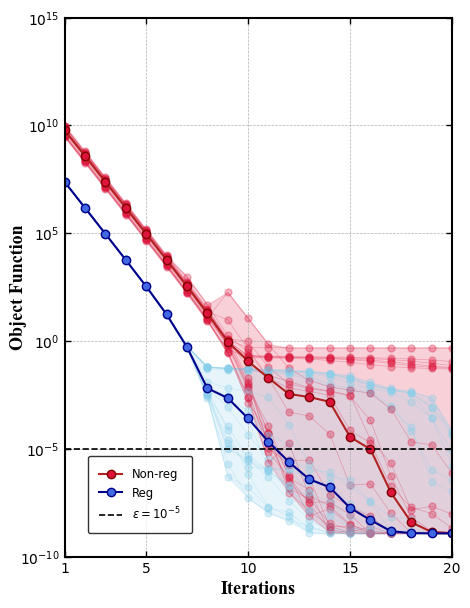

In [5]:
label_set = ["Non-reg", "Reg"]
max_iter = max_iter_num
epsilon = 1e-5

log_file = open("Inf_reg_202406171657.txt", "r")
lf = log_file.readlines()
log_file.close()

data_list = []
counter = 0
for line in lf:
    if "Current object function" in line and "*" not in line:
        content = line.strip().split()
        data_list.append(float(content[-1]))
        if counter == 0:
            original_obj = float(content[-1])
        counter += 1

indx = np.argwhere(
    (original_obj == np.array(data_list))
).squeeze()  # index of original object function
indx_non_reg = indx[0::2]
indx_reg = indx[1::2]

nreg_obj_data = {}
reg_obj_data = {}
for ind in range(len(indx_non_reg)):
    nreg_obj_data[ind] = np.array(
        [data for data in data_list[indx_non_reg[ind] + 1 : indx_reg[ind]]]
    )
    if ind < len(indx_non_reg) - 1:
        reg_obj_data[ind] = np.array(
            [data for data in data_list[indx_reg[ind] + 1 : indx_non_reg[ind + 1]]]
        )
    else:
        reg_obj_data[ind] = np.array([data for data in data_list[indx_reg[ind] + 1 :]])


# 计算中位数曲线
def median_curve_and_error(obj_data, max_iter_num):
    obj_in_each_iter = [[]] * max_iter_num  # 统计每轮迭代的目标函数数组
    for j, obj_line in enumerate(list(obj_data.values())):
        if (
            len(obj_line) != max_iter_num
        ):  # 如果迭代不满最大迭代次数，就重复最后一次迭代目标函数，一面影响中位数曲线
            obj_line = np.hstack(
                [obj_line, [obj_line[-1]] * (max_iter_num - len(obj_line))]
            )
        for i in range(len(obj_line)):
            obj_in_each_iter[i] = obj_in_each_iter[i] + [obj_line[i]]

    median_line = np.zeros(max_iter_num)
    # RMSE = np.zeros(20) # 均方根误差太大
    error_lines = np.zeros([2, max_iter_num])  # 记录每一个位置的最大最小值

    for i, obj_list in enumerate(obj_in_each_iter):
        if len(obj_list) != 0:
            median_line[i] = np.median(obj_list)  # np.array(obj_list).mean()  #
            # RMSE[i] = np.sum(np.abs(mean_line_nreg[i] - np.array(obj_list)))/len(obj_list)
            error_lines[0, i] = np.abs(
                np.min(median_line[i] - np.array(obj_list))
            )  # 上界
            error_lines[1, i] = -np.abs(
                np.max(median_line[i] - np.array(obj_list))
            )  # 下界
    return median_line, error_lines


median_line_nreg, error_lines_nreg = median_curve_and_error(nreg_obj_data, max_iter)
median_line_reg, error_lines_reg = median_curve_and_error(reg_obj_data, max_iter)

lw = 1.1
fig, ax = plt.subplots(1, 1, figsize=(5, 7))
ax.spines["left"].set_linewidth(lw)
ax.spines["top"].set_linewidth(lw)
ax.spines["right"].set_linewidth(lw)
ax.spines["bottom"].set_linewidth(lw)

# 将所有目标函数曲线也绘制出来
for ind in range(len(indx_non_reg)):
    ax.plot(
        [i for i in range(1, len(nreg_obj_data[ind]) + 1)],
        nreg_obj_data[ind],
        "o-",
        markersize=5,
        color="crimson",
        alpha=0.3,
        linewidth=0.5,
    )
    ax.plot(
        [i for i in range(1, len(reg_obj_data[ind]) + 1)],
        reg_obj_data[ind],
        "o-",
        markersize=5,
        color="skyblue",
        alpha=0.3,
        linewidth=0.5,
    )

ax.plot(
    [i for i in range(1, len(median_line_nreg) + 1)],
    median_line_nreg,
    "o-",
    color="firebrick",
    markeredgecolor="maroon",
    markerfacecolor="crimson",
    label=label_set[0],
)

ax.fill_between(
    [i for i in range(1, len(median_line_nreg) + 1)],
    error_lines_nreg[0] + median_line_nreg,
    error_lines_nreg[1] + median_line_nreg,
    color="crimson",
    alpha=0.2,
)

# ax.errorbar([i for i in range(1, len(mean_line_nreg)+1)],mean_line_nreg,yerr=RMSE_nreg,fmt='-o',color = 'black',label="0.5-2ndHeating",elinewidth=1,capsize=3)
ax.plot(
    [i for i in range(1, len(median_line_reg) + 1)],
    median_line_reg,
    "o-",
    color="darkblue",
    markeredgecolor="darkblue",
    markerfacecolor="royalblue",
    label=label_set[1],
)

ax.fill_between(
    [i for i in range(1, len(median_line_reg) + 1)],
    error_lines_reg[0] + median_line_reg,
    error_lines_reg[1] + median_line_reg,
    color="skyblue",
    alpha=0.2,
)

ax.set_ylabel(
    "Object Function",
    fontfamily="Times New Roman",
    fontsize=13,
    fontweight="bold",
    labelpad=-5,
)
ax.set_xlabel(
    "Iterations", fontfamily="Times New Roman", fontsize=13, fontweight="bold"
)
ax.set_yscale("log")
ax.set_ylim([1e-10, 1e15])
ax.set_xlim([1, 20])
ax.set_xticks([1, 5, 10, 15, 20])
ax.set_yticks([1e-10, 1e-5, 1, 1e5, 1e10, 1e15])
ax.tick_params(
    top=True,
    right=True,
    which="major",
    direction="in",
    length=4,
    width=1.0,
    colors="black",
    labelsize=10,
)

ax.tick_params(
    top=True,
    right=True,
    direction="in",
    which="minor",
    length=2,
    width=0.8,
    colors="black",
)

ax.grid(visible=True, axis="both", which="major", linestyle="--", linewidth=0.5)

ax.axhline(
    y=epsilon,
    linestyle="--",
    linewidth=1.2,
    color="black",
    label="$\epsilon=10^{-5}$",
)
lw = 1.5
ax.spines["left"].set_linewidth(lw)
ax.spines["top"].set_linewidth(lw)
ax.spines["right"].set_linewidth(lw)
ax.spines["bottom"].set_linewidth(lw)

ax.legend(
    title="",
    fontsize="small",
    loc="lower left",
    borderpad=1.0,  # 留白
    borderaxespad=2.0,  # 图框边界距离坐标轴距离
    labelspacing=0.5,  # 图例条目间距
    edgecolor="black",
    handlelength=2.0,
)
# ax.legend(loc=1,fontsize='small')
# plt.tight_layout()
plt.show(block=True)
fig.savefig("New_old_reuslt.pdf", dpi=600, format="pdf")

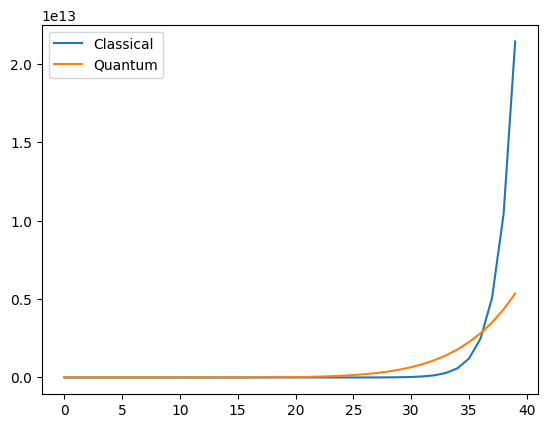

In [16]:
x = np.arange(40.0)
cl_complex = x * 2**x
qa_complex = x**8

plt.plot(cl_complex, label="Classical")
plt.plot(qa_complex, label="Quantum")
plt.legend()

In [17]:
2**32

4294967296